<font color= blue>


# Machine Learning with Python

#  Classification

<font color= blue>

# IMPORTING DEPENDENCIES AND LOADING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic['survived'].unique()

array([0, 1])

In [6]:
titanic['pclass'].unique()

array([3, 1, 2])

In [7]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
titanic['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [9]:
titanic['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [10]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
titanic['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [12]:
titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [13]:
titanic['adult_male'].unique()

array([ True, False])

In [14]:
titanic['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [15]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [16]:
titanic['alive'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
titanic['alone'].unique()

array([False,  True])

In [18]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Feature Subset selection

In [19]:
# Dropping duplicated columns - Feature subset selection
titan = titanic.drop(columns = ['class', 'embark_town','adult_male','deck','alive','alone'])

In [20]:
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman
3,1,1,female,35.0,1,0,53.1000,S,woman
4,0,3,male,35.0,0,0,8.0500,S,man


## Feature creation

In [21]:
# Adding a new column - Feature creation

titan['family_size']= titan['sibsp'] + titan['parch'] +1

In [22]:
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,family_size
0,0,3,male,22.0,1,0,7.2500,S,man,2
1,1,1,female,38.0,1,0,71.2833,C,woman,2
2,1,3,female,26.0,0,0,7.9250,S,woman,1
3,1,1,female,35.0,1,0,53.1000,S,woman,2
4,0,3,male,35.0,0,0,8.0500,S,man,1


In [23]:
# Dropping the features 'sibsp' and 'parch' from the dataframe
titan = titan.drop(columns = ['sibsp','parch'])

In [24]:
titan.head()

,survived,pclass,sex,age,fare,embarked,who,family_size
0,0,3,male,22.0,7.2500,S,man,2
1,1,1,female,38.0,71.2833,C,woman,2
2,1,3,female,26.0,7.9250,S,woman,1
3,1,1,female,35.0,53.1000,S,woman,2
4,0,3,male,35.0,8.0500,S,man,1


In [25]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Feature Transformation
### Filling null values 

In [26]:
# Looking at number of missing values using 'isnull()' function
print( 'Columns and number of missing values')
for column in titan.columns:
    print(column +":" + str(titan[column].isnull().sum()))

Columns and number of missing values
survived:0
pclass:0
sex:0
age:177
fare:0
embarked:2
who:0
family_size:0


In [27]:
# Tackling the feature 'embarked' to replace null values. 

titan['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [28]:
titan['embarked'].value_counts().index[0]

'S'

In [29]:
# Fills null values with 'S', the most common occurence


titan['embarked'] = titan['embarked'].fillna(titan['embarked'].value_counts().
                                              index[0],inplace =False)

In [30]:
titan['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [31]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   fare         891 non-null    float64
 5   embarked     891 non-null    object 
 6   who          891 non-null    object 
 7   family_size  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [32]:
# Filling null celss of age
titan[['who','age']].head(10)

,who,age
0,man,22.0
1,woman,38.0
2,woman,26.0
3,woman,35.0
4,man,35.0
5,man,NaN
6,man,54.0
7,child,2.0
8,woman,27.0
9,child,14.0


In [33]:
titan['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [34]:
titan['age'].mean()

29.69911764705882

In [35]:
titan['age'].median()

28.0

In [36]:
titan['age']=titan['age'].fillna(titan['age'].median())

In [37]:
titan['age'].value_counts().head()

28.0    202
24.0     30
22.0     27
18.0     26
19.0     25
Name: age, dtype: int64

In [38]:
titan['age'].value_counts().tail()

36.50    1
55.50    1
0.92     1
23.50    1
74.00    1
Name: age, dtype: int64

In [39]:
titan.isnull().sum()

survived       0
pclass         0
sex            0
age            0
fare           0
embarked       0
who            0
family_size    0
dtype: int64

## Feature Transformation
### Converting Data Type

In [40]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   fare         891 non-null    float64
 5   embarked     891 non-null    object 
 6   who          891 non-null    object 
 7   family_size  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [41]:
titan['sex'].unique()

array(['male', 'female'], dtype=object)

In [42]:
titan['sex'] = titan['sex'].map({"male": 0, "female":1})

In [43]:
titan['sex'].unique()

array([0, 1])

In [44]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   fare         891 non-null    float64
 5   embarked     891 non-null    object 
 6   who          891 non-null    object 
 7   family_size  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [45]:
# Converting embarked
titan['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [46]:
titan['embarked'] = titan['embarked'].map({"S": 0, "C":1, "Q":2})

In [47]:
titan['embarked'].value_counts()

0    646
1    168
2     77
Name: embarked, dtype: int64

In [48]:
# Converting 'who'
titan['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [49]:
titan['who'] = titan['who'].map({"man":0, "woman":1,"child":2})

In [50]:
titan['who'].value_counts()

0    537
1    271
2     83
Name: who, dtype: int64

In [51]:
# Looking at number of missing values using 'isnull()' function
print( 'Columns and number of missing values')
for column in titan.columns:
    print(column +":" + str(titan[column].isnull().sum()))

Columns and number of missing values
survived:0
pclass:0
sex:0
age:0
fare:0
embarked:0
who:0
family_size:0


In [52]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   fare         891 non-null    float64
 5   embarked     891 non-null    int64  
 6   who          891 non-null    int64  
 7   family_size  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [53]:
titan.head(10)

,survived,pclass,sex,age,fare,embarked,who,family_size
0,0,3,0,22.0,7.2500,0,0,2
1,1,1,1,38.0,71.2833,1,1,2
2,1,3,1,26.0,7.9250,0,1,1
3,1,1,1,35.0,53.1000,0,1,2
4,0,3,0,35.0,8.0500,0,0,1
5,0,3,0,28.0,8.4583,2,0,1
6,0,1,0,54.0,51.8625,0,0,1
7,0,3,0,2.0,21.0750,0,2,5
8,1,3,1,27.0,11.1333,0,1,3
9,1,2,1,14.0,30.0708,1,2,2


In [54]:
## Applying transformed data for ML modeling

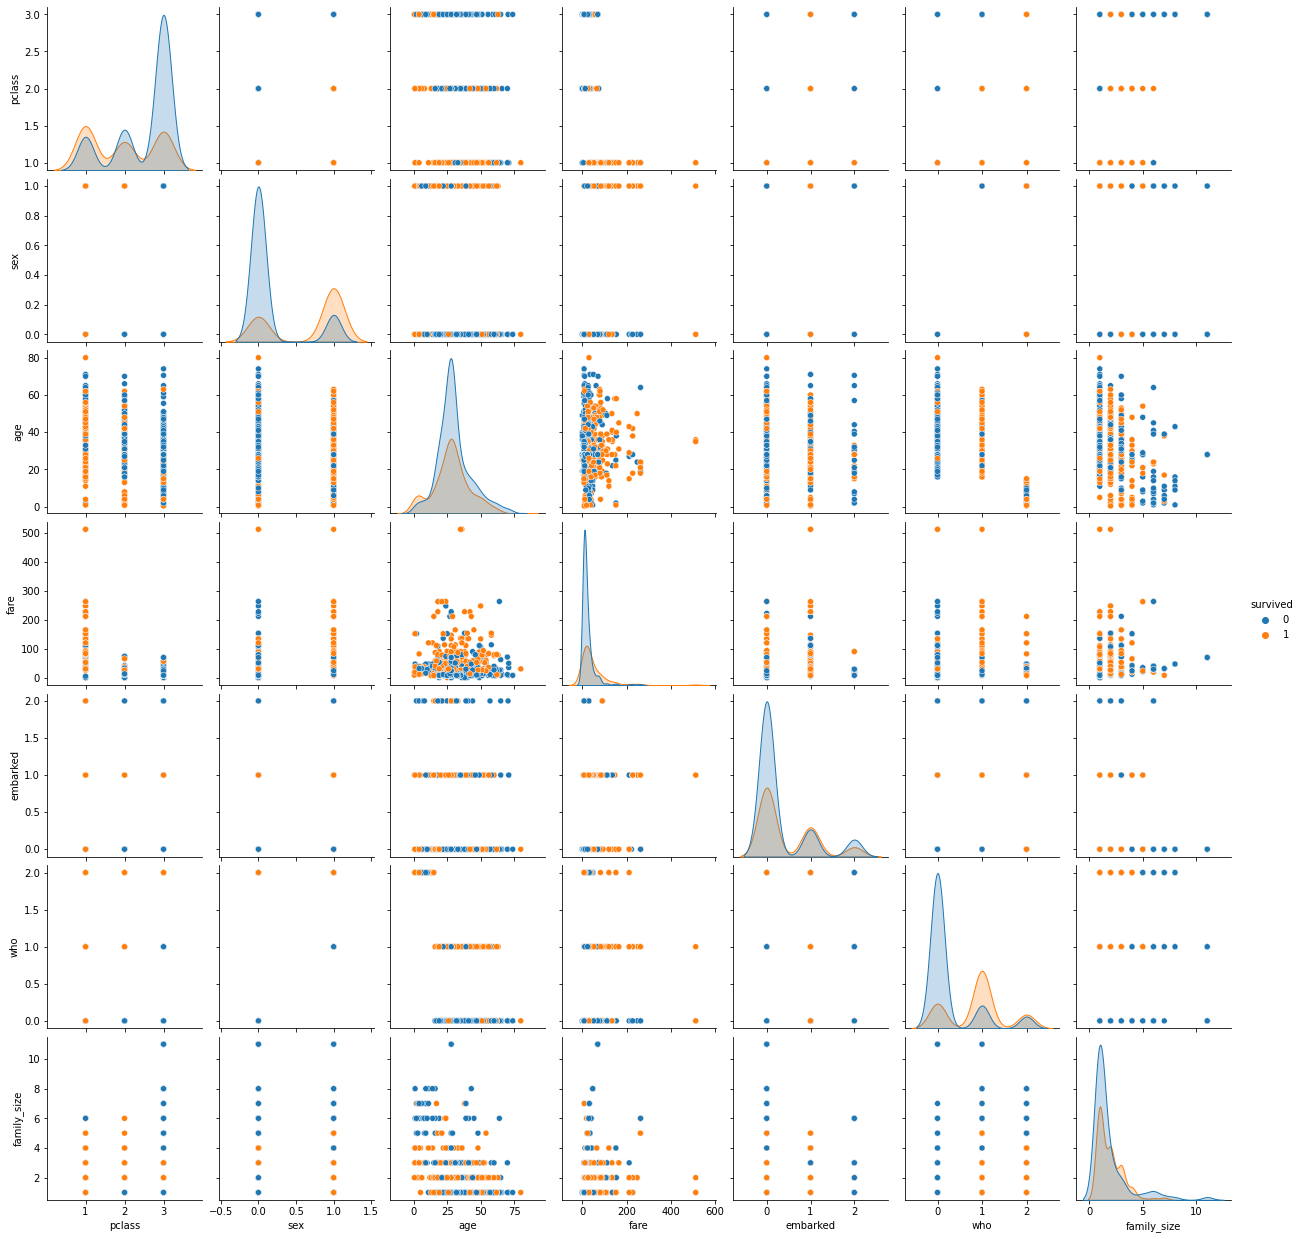

In [55]:
sns.pairplot(titan, hue='survived');

In [56]:
# Splitting into features
titan_feature = titan.iloc[:,:-1]
titan_feature.head()

,survived,pclass,sex,age,fare,embarked,who
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,1
4,0,3,0,35.0,8.0500,0,0


In [57]:
# Separating Labels
titan_label = titan.loc[:,['survived']]
titan_label.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [58]:
# Using train_test_split function for random spliting of data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(titan_feature,titan_label,random_state=0,test_size =0.2)

## Applying on Different Classifiers 

## 1) KNN Classifer

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier(n_neighbors =5)

In [61]:
knn= knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [62]:
y_pred1=knn.predict(X_test)
print("Prediction of test data:",y_pred1)

Prediction of test data: [0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [63]:
## accuracy
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred1))

0.7821229050279329


## 2)  Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
tr= DecisionTreeClassifier(max_depth=3)

In [66]:
tr = tr.fit(X_train,y_train)

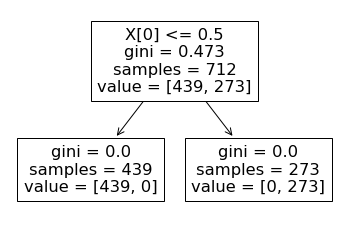

In [67]:
from sklearn import tree
tree.plot_tree(tr);

In [68]:
y_pred2=tr.predict(X_test)
print("Prediction of test data:",y_pred2)

Prediction of test data: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [69]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred2))

1.0


## 3) Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(n_estimators =3, random_state =0)

In [72]:
rf = rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [73]:
y_pred3=rf.predict(X_test)
print("Prediction of test data:",y_pred3)

Prediction of test data: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [74]:
y_test.head(10)

,survived
495,0
648,0
278,0
31,1
255,1
298,1
609,1
318,1
484,1
367,1


In [75]:
from sklearn import metrics

accuracy_3  = metrics.accuracy_score(y_test,y_pred3)

print("accuracy of RF ", accuracy_3)

accuracy of RF  1.0


## 4) Naive Bayes 

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
gnb= GaussianNB()

In [78]:
gnb = gnb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
y_pred4=gnb.predict(X_test)
print("Prediction of test data:",y_pred4)

Prediction of test data: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [80]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred4))

1.0


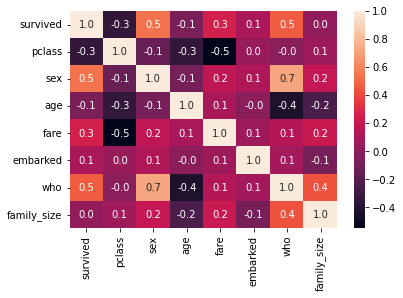

In [81]:
#Heat map of titan dataset giving coorelation between variables. 
sns.heatmap(titan.corr(), annot=True,fmt=".1f");

# Binary Classification



## 5) Logistic regression



### Cost Function
### Gradiant Descent - to reduce the cost
![Gradient%20Descent%201.png](attachment:Gradient%20Descent%201.png)
![Gradient%20Descent.png](attachment:Gradient%20Descent.png)
### Fitting a model - reducing the gradient descent to global minimum

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lr = LogisticRegression()

In [84]:
lr = lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [85]:
y_pred_lr=lr.predict(X_test)
print("The predicted values are:",y_pred_lr)

The predicted values are: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [86]:
from sklearn import metrics
accuracy_lr  = metrics.accuracy_score(y_test,y_pred_lr)
print("Accuracy of the Logistic regression:",accuracy_lr)

Accuracy of the Logistic regression: 1.0


In [87]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lr)
print ( "Confusion Matrix of Logistic Regression: \n", cm)

Confusion Matrix of Logistic Regression: 
 [[110   0]
 [  0  69]]


In [88]:
# Prediction for a new data
#Suppose pclass: 2, sex: 1, age: 35, fare: 28, embarked: 1, who:1, family_size : 2
new_passenger = [[2,1,35,28,1,1,2]]
new_passenger = pd.DataFrame(new_passenger)
new_pred=lr.predict(new_passenger)
print("The stauts of the new_passenger\n",new_passenger, "\n is given by:  ", new_pred)
if new_pred == 0:
    print("Sorry, the passenger is not Survided ..! RIP")
if new_pred == 1:
    print("Thank God, the passenger is Survived. .!")

The stauts of the new_passenger
    0  1   2   3  4  5  6
0  2  1  35  28  1  1  2 
 is given by:   [1]
Thank God, the passenger is Survived. .!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


## 6) Support Vector Classifier



In [89]:
from sklearn.svm import LinearSVC

In [90]:
svc = LinearSVC()

In [91]:
svc = svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [92]:
y_pred_svc = svc.predict(X_test)
print("The predicted values are:",y_pred_svc)

The predicted values are: [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [93]:
y_test.head(10)

,survived
495,0
648,0
278,0
31,1
255,1
298,1
609,1
318,1
484,1
367,1


In [94]:
accuracy_svc  = metrics.accuracy_score(y_test,y_pred_svc)
print("Accuracy of the Logistic regression:",accuracy_svc)

Accuracy of the Logistic regression: 1.0


In [97]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_svc)
print ( "Confusion Matrix of Logistic Regression: \n", cm)

Confusion Matrix of Logistic Regression: 
 [[110   0]
 [  0  69]]


## 7) Stochastic Gradient Descent Classifier


In [98]:
from sklearn.linear_model import SGDClassifier

In [99]:
sgd = SGDClassifier()

In [100]:
sgd = sgd.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
pred_sgd = sgd.predict(X_test)
print( "Prediction of SGDC: ", pred_sgd)

Prediction of SGDC:  [0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [102]:
accuracy_sgd = metrics. accuracy_score(y_test, pred_sgd)
print("Accuracy of S G D C : ", accuracy_sgd)

Accuracy of S G D C :  0.8715083798882681


In [103]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_sgd)
print ( "Confusion Matrix of Logistic Regression: \n", cm)

Confusion Matrix of Logistic Regression: 
 [[87 23]
 [ 0 69]]
